In [73]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [83]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import joblib

In [5]:
df = pd.read_csv("workout_fitness_tracker_data.csv")

In [7]:
df

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,20,Other,173,59,Yoga,95,230,160,1330,12.83,Medium,10.0,1.9,3718,56,38.4,28.5,Neutral,Neutral
9996,9997,29,Female,171,71,HIIT,83,539,170,3236,9.74,Low,9.4,1.9,2752,72,38.4,28.5,Tired,Fatigued
9997,9998,47,Male,183,75,Running,89,886,114,10532,14.51,Medium,8.1,1.9,1572,73,38.4,28.5,Neutral,Fatigued
9998,9999,52,Male,170,97,HIIT,28,447,102,13690,1.43,Low,7.3,1.9,2172,84,38.4,28.5,Stressed,Fatigued


In [11]:
cols_to_float = [
    "Workout Duration (mins)",
    "Calories Burned",
    "Heart Rate (bpm)",
    "Resting Heart Rate (bpm)",
    "Steps Taken",
    "Workout Intensity",
    "Sleep Hours",
    "Water Intake (liters)",
    "Daily Calories Intake",
    "VO2 Max"
]

df[cols_to_float] = df[cols_to_float].apply(pd.to_numeric, errors="coerce")

In [23]:
conditions = [
    (df["Workout Duration (mins)"] > 90),
    (df["Calories Burned"] > 800),
    (df["Heart Rate (bpm)"] > 110),
    (df["Resting Heart Rate (bpm)"] > 80),
    (df["Steps Taken"] > 18000),
    (df["Workout Intensity"] >= 8),
    (df["Sleep Hours"] < 5),
    (df["Water Intake (liters)"] < 1.5),
    (df["Daily Calories Intake"] < 1800),
    (df["VO2 Max"] < 30)
]

df["fatigue_label"] = (sum(conditions) >= 3).astype(int)  # 3개 이상 만족 시 과로

In [37]:
d=pd.DataFrame()

In [39]:
d["heartRate"] = df["Heart Rate (bpm)"]
d["stepCount"] = df["Steps Taken"]
d["activeEnergyBurned"] = df["Calories Burned"]
d["runningSpeed"] = df["Distance (km)"] / df["Workout Duration (mins)"]
d['fatigue_label'] = df['fatigue_label']

In [41]:
d

,heartRate,stepCount,activeEnergyBurned,runningSpeed,fatigue_label
0,112,8850,384,0.182785,0
1,168,2821,612,0.015068,0
2,133,18898,540,0.269630,0
3,118,14102,672,0.167949,0
4,170,16518,410,0.056607,0
...,...,...,...,...,...
9995,160,1330,230,0.135053,0
9996,170,3236,539,0.117349,0
9997,114,10532,886,0.163034,1
9998,102,13690,447,0.051071,0


In [47]:
d.isna().sum()

heartRate             0
stepCount             0
activeEnergyBurned    0
runningSpeed          0
fatigue_label         0
dtype: int64

In [57]:
X = d.drop(columns=["fatigue_label"])
y = d["fatigue_label"]

In [69]:
d.to_csv("fatigue_dataset.csv", index=False)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)


In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [64]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

Confusion Matrix:
[[1459   88]
 [ 268  185]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8448    0.9431    0.8913      1547
           1     0.6777    0.4084    0.5096       453

    accuracy                         0.8220      2000
   macro avg     0.7612    0.6758    0.7005      2000
weighted avg     0.8070    0.8220    0.8048      2000



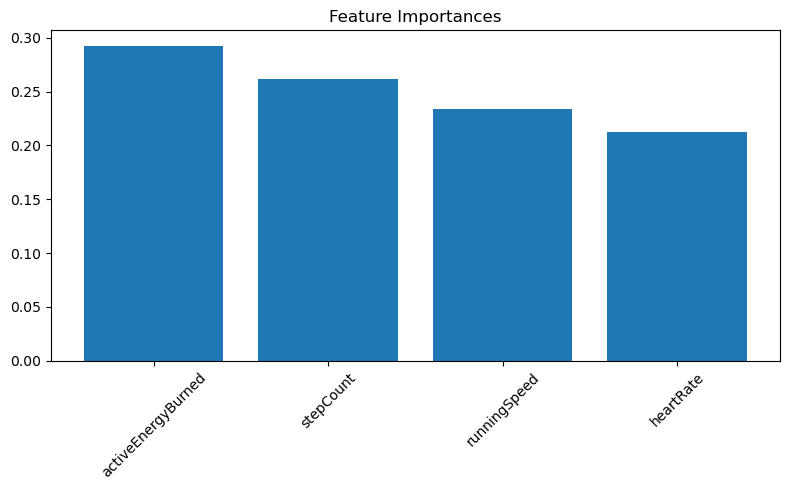

In [67]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(8, 5))
plt.title("Feature Importances")
plt.bar(range(len(features)), importances[indices], align='center')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


In [85]:
joblib.dump(model, "fatigue_detection_model.joblib")

['fatigue_detection_model.joblib']